In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [4]:
pd.pandas.set_option('display.max_columns',None)

In [5]:
data = pd.read_csv('C:/Users/Microsoft/Desktop/kc_house_data.csv')

In [6]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [8]:
data.drop(columns=['id','date'],inplace=True)

In [9]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
data.shape

(21613, 19)

In [11]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [12]:
data.drop(columns=['yr_built','yr_renovated','zipcode'],inplace=True)

In [13]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,47.6168,-122.045,1800,7503


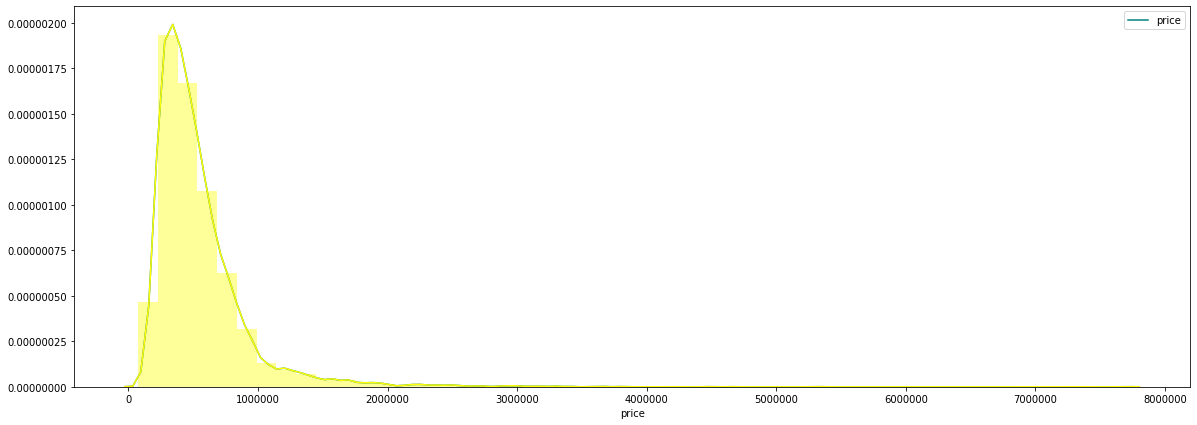

In [14]:
plt.figure(figsize=(20,7))
ax = sns.kdeplot(data['price'],color='teal')
sns.distplot(data['price'],color='yellow')
plt.show()

## We are skipping the EDA Part of it and Focusing on how to make ann Model for this one.

In [15]:
print('Skewness of the price',data['price'].skew())
print('Kurltoisis of the price',data['price'].kurt())

Skewness of the price 4.024069144684712
Kurltoisis of the price 34.58554043194243


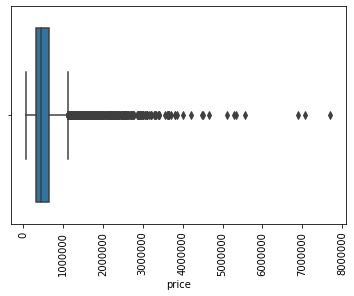

In [16]:
sns.boxplot(data['price'])
plt.xticks(rotation=90)
plt.show()

In [17]:
data.shape

(21613, 16)

In [18]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)

IQR = Q3-Q1 
IQR

323050.0

In [19]:
dataiqr = data[~((data['price']<Q1-1.5*IQR)|(data['price']>Q3+1.5*IQR))]

In [20]:
dataiqr.shape

(20467, 16)

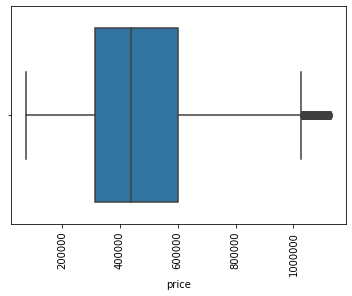

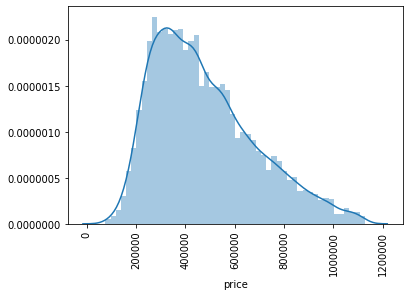

Skewness of the price 0.7501833824182833
Kurltoisis of the price -0.0006910700414262116


In [21]:
sns.boxplot(dataiqr['price'])
plt.xticks(rotation=90)
plt.show()
sns.distplot(dataiqr['price'])
plt.xticks(rotation=90)
plt.show()

print('Skewness of the price',dataiqr['price'].skew())
print('Kurltoisis of the price',dataiqr['price'].kurt())

## Start The Model Preprepartaion.

In [22]:
data = dataiqr

In [23]:
data.shape

(20467, 16)

In [24]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,47.6168,-122.045,1800,7503


In [25]:
x = data.drop(columns=['price'])
y = data['price']

In [26]:
x.shape,y.shape

((20467, 15), (20467,))

In [27]:
x.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
count,20467.000000,20467.000000,20467.000000,2.046700e+04,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000
mean,3.329750,2.051632,1975.558167,1.461041e+04,1.476035,0.002980,0.172668,3.406361,7.530561,1708.330972,267.227195,47.556888,-122.213265,1922.255191,12447.084526
std,0.912885,0.711906,774.833460,4.010956e+04,0.537033,0.054513,0.640950,0.647228,1.039192,727.296461,409.031661,0.141038,0.142412,614.932010,26538.592250
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1170.000000,0.000000,47.460400,-122.330000,1470.000000,5046.000000
50%,3.000000,2.000000,1860.000000,7.500000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1520.000000,0.000000,47.567000,-122.232000,1800.000000,7542.000000
75%,4.000000,2.500000,2431.000000,1.031900e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2100.000000,510.000000,47.679800,-122.123000,2280.000000,9883.500000
max,33.000000,7.500000,7480.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,5710.000000,2720.000000,47.777600,-121.315000,5380.000000,871200.000000


In [28]:
feature = x.columns
feature

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80,random_state=42)

In [30]:
x_train.shape,x_test.shape

((16373, 15), (4094, 15))

In [31]:
scaler = StandardScaler()
x_train_scalled =scaler.fit_transform(x_train)
x_test_scalled  = scaler.transform(x_test)

In [32]:
X_train = pd.DataFrame(x_train_scalled,columns=feature)
X_test  = pd.DataFrame(x_test_scalled,columns=feature)

In [33]:
X_train.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
count,1.637300e+04,1.637300e+04,1.637300e+04,1.637300e+04,1.637300e+04,1.637300e+04,1.637300e+04,1.637300e+04,1.637300e+04,1.637300e+04,1.637300e+04,1.637300e+04,1.637300e+04,1.637300e+04,1.637300e+04
mean,2.697680e-16,-8.820486e-17,-7.481444e-17,-1.457875e-17,1.350257e-15,7.523036e-16,-6.341419e-17,2.149919e-15,-2.042043e-16,-9.489752e-17,1.015007e-15,1.680924e-14,-3.358857e-15,8.612315e-17,8.017976e-17
std,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00
min,-3.613875e+00,-2.877498e+00,-2.175261e+00,-3.490493e-01,-8.873110e-01,-5.644537e-02,-2.698408e-01,-3.716117e+00,-6.254325e+00,-1.946993e+00,-6.532021e-01,-2.839349e+00,-2.153291e+00,-2.465770e+00,-4.549565e-01
25%,-3.575292e-01,-7.784280e-01,-7.456658e-01,-2.385836e-01,-8.873110e-01,-5.644537e-02,-2.698408e-01,-6.236654e-01,-5.143526e-01,-7.286909e-01,-6.532021e-01,-6.869483e-01,-8.219623e-01,-7.367587e-01,-2.847592e-01
50%,-3.575292e-01,-7.873809e-02,-1.532210e-01,-1.759920e-01,-8.873110e-01,-5.644537e-02,-2.698408e-01,-6.236654e-01,-5.143526e-01,-2.632719e-01,-6.532021e-01,7.205606e-02,-1.316440e-01,-1.878662e-01,-1.882535e-01
75%,7.279196e-01,6.209518e-01,5.937745e-01,-1.064733e-01,9.738142e-01,-5.644537e-02,-2.698408e-01,9.225602e-01,4.423094e-01,5.443668e-01,5.961678e-01,8.728340e-01,6.361591e-01,5.708969e-01,-9.792421e-02
max,3.220593e+01,7.617851e+00,7.084908e+00,4.034749e+01,3.765502e+00,1.771625e+01,6.001420e+00,2.468786e+00,4.268957e+00,5.417577e+00,6.010104e+00,1.562452e+00,6.327764e+00,4.881317e+00,2.116100e+01


## Develope An ANN

In [48]:
from sklearn.metrics import median_absolute_error

In [49]:
from sklearn.neural_network import MLPRegressor  #arficial neural network

In [50]:
nn = MLPRegressor(hidden_layer_sizes=(10,10,10),activation='relu',max_iter=1000,batch_size=20,random_state=42,solver='adam')   #Here the 10-10 is node for 2 layers

In [51]:
nn.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size=20, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [52]:
y_pred =nn.predict(X_test)

In [53]:
print('Mean Squared Error :-',np.sqrt(mean_squared_error(y_test,y_pred)))
print('mean Absolute error :-',mean_squared_error(y_test,y_pred))
print('R2 Score :-',r2_score(y_test,y_pred))

Mean Squared Error :- 111514.61053388772
mean Absolute error :- 12435508362.524664
R2 Score :- 0.7013857112406487


## Evaluate the model.

In [55]:
from sklearn

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets